# Algoritmos genéticos: Ejemplo aproximando una función

Instalamos las bibliotecas necesarias

In [36]:
pip install deap

In [37]:
import random
import array
import random
import math
import matplotlib.pyplot as plt

import numpy
from deap import base, creator, tools, algorithms

In [44]:
puntos = [-9.47530499, -8.20053076, -7.06007355, -6.07004795, -5.27138796, -4.66909356, -4.19457453, -3.84919918, -3.65942874, -3.55181112, -3.51373936, -3.57264491, -3.64987936, -3.70235606, -3.740946, -3.77725596, -3.69827274, -3.61302712, -3.41808667, -3.08308666, -2.70158321, -2.22867037, -1.6511668, -1.03678599, -0.38456232, 0.33075079, 1.02477883, 1.73094186, 2.36205994, 2.95806084, 3.4237866, 3.82636692, 4.13496303, 4.27157043, 4.29493587, 4.17829624, 3.95409283, 3.56992402, 3.12288977, 2.54601402, 1.91026026, 1.22867569, 0.5422082, -0.15349255, -0.811973, -1.42121758, -1.95555196, -2.40673855, -2.74191681, -2.9531929, -3.02569868, -2.96935198, -2.8077883, -2.51352989, -2.1299076, -1.63410109, -1.10580826, -0.51745204, 0.10152695, 0.72202862, 1.30413158, 1.86537205, 2.32219095, 2.72308679, 3.03966672, 3.25492871, 3.40087177, 3.39878705, 3.35382379, 3.21714617, 3.03930083, 2.80648229, 2.55612964, 2.37850053, 2.17973998, 2.08049234, 2.03455593, 2.11668995, 2.36365782, 2.70136088, 3.20906666, 3.88418985, 4.75685859, 5.73009392, 6.89142106, 8.19980283, 9.64580405, 11.17160365, 12.77006736, 14.48209584, 16.1949218, 17.94359567, 19.65124253, 21.36240072, 23.01681852, 24.63925159, 26.20180742, 27.69009341, 29.13518722, 30.54860084]


Definimos lso parametros de nuestro algoritmo


In [52]:
generaciones = 100
tamaño_poblacion = 100
longitud_cromosoma = 5
objetivo = 3
tamaño_torneo = 3
poblacion = []
puntos_criticos = []

In [46]:
def f(x):
  return a*x**3 + b*x**2 - c * x - d * math.cos(e*x)

Definimos la función de aptitud

In [72]:
def fitness(individuo: list[int]):
  a, b, c, d, e, *rest = individuo

  error_suma = 0
  def f(x):
    return a*x**3 + b*x**2 - c * x - d * math.cos(e*x)

  for i, punto in enumerate(puntos):
    aprox = f(i)
    error = abs(aprox - punto)
    error_suma += error
  return error_suma / len(puntos),

Configuramos la evolución

In [71]:
# Configuración de DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_float", random.random)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, longitud_cromosoma)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=tamaño_torneo)

Iniciamos la evolución

In [67]:
random.seed(64)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, halloffame=hof, verbose=True)

ganador = tools.selBest(pop, k=1)[0]

Se han truncado las últimas 5000 líneas del flujo de salida.
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 2]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 7]
[0, 0, 0, 0, 5]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 5]
[0, 0, 0, 0, 5]
[0, 0, 0, 0, 2]
[1, 0, 0, 1, 0]
[0, 0, 0, 0, 2]
[0, 0, 0, 0, 2]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 5]
[0, 0, 0, 0, 6]
[0, 0, 1, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 2]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 5]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 2]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 7]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 5]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 2]
[0, 0, 0, 0, 6]
[0, 0, 0, 0, 7]
[0, 0, 0, 0, 6]
[0, 0, 0, 1, 7]
[0, 0, 0, 0, 5]
[0, 0, 0, 0, 5]
[1, 0, 0, 0, 2]
[0, 0, 0, 0

In [68]:
ganador

[0, 0, 0, 1, 1]

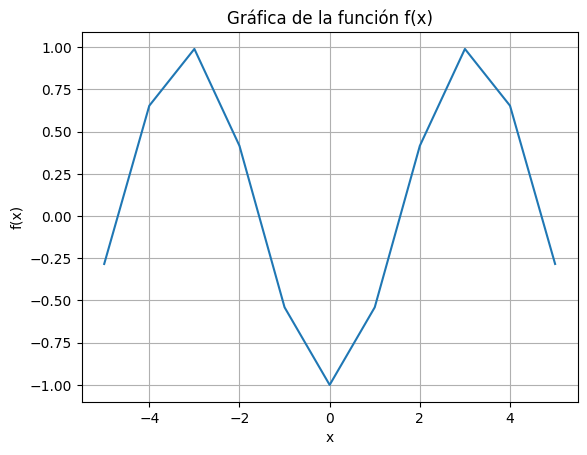

In [69]:
a, b, c, d, e, *rest = ganador

def f(x):
  return a*x**3 + b*x**2 - c * x - d * math.cos(e*x)

# Crea un rango de valores de x desde -5 hasta 5
x = range(-5, 6)

# Calcula los valores correspondientes de y
y = [f(x_val) for x_val in x]

# Grafica la función
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función f(x)')
plt.grid(True)
plt.show()